## Machine Learning - Problema de Regresión

En este ejercicio partiremos de un dataset de prueba para su análisis y la posterior creación de un modelo de regresión que tratará de estimar el valor de una variable dependiente en casos futuros.

Se usará **Jupyter Notebook** y **Python** como lenguaje de programación.

<br><br>**Juan Manuel Ramos Pérez**

========================================================================================================================

## 1. Librerías

Comenzamos estableciendo todas las librerías de Python que nos harán falta para la realización del ejercicio, ordenadas según su función.

In [1]:
# Tratamiento de datos
# ========================================
import numpy as np
import pandas as pd


# Gráficos
# ========================================
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns


# Preprocesado y modelado
# ========================================
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm



In [2]:
# Configuración
# ========================================
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('display.max_rows', None)

## 2. Carga del dataset

Cargamos el dataset en el proyecto. Este se puede encontrar disponible en [Kaggle](https://www.kaggle.com/mirichoi0218/insurance) y [Github](https://github.com/stedy/Machine-Learning-with-R-datasets).

Este dataset está compuesto por 1338 filas, y recoge diferentes datos personales y médicos de clientes con el objetivo de establecer la cantidad económica a percibir por parte de un seguro. La idea es crear un modelo que sea capaz de predecir de forma precisa los costes del seguro que se le aplicarán a un cliente en función de los datos mencionados.

Las columnas de las que se compone el dataset son las siguientes:
* Edad (Age): numérica
* Sexo (Sex): categórica
* Índice de Masa Coporal (BMI): numérica
* Número de hijos (Children): numérica
* Fumador (Smoker): categórica
* Región (Region): categórica
* Cargos del seguro (Charges): numérica


La variable "charges" será nuestra variable respuesta, o variable dependiente, aquella que queremos que nuestro modelo estime en datos futuros. Al tratarse de una variable numérica continua estamos ante un problema de regresión, en el que tenemos como variables independientes o predictores tanto variables numéricas como categóricas.

In [3]:
df = pd.read_csv('data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


## 3. Análisis de los datos

En esta parte del ejercicio nos centraremos en analizar los datos de los que disponemos. Comprobar su distribución en el dataset, averiguar si se están reconociendo de forma adecuada, duplicidad, datos faltantes, así como decidir si debemos realizar algún o algunos cambios sobre ellos en el apartado de preprocesado de cara a construir el modelo de predicción.

En primer lugar comprobamos el tipo de dato interpretado por el dataframe de Pandas, y verificamos que todo está como se espera.

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Comprobamos si hay celdas vacías en alguno de los registros. 

Esta comprobación es importante, ya que la existencia de valores nulos o vacíos pueden llegar a tener un impacto negativo considerable en el entrenamiento del modelo. En caso de que los hubiese tendríamos que decidir de qué forma lidiar con ellos, o bien eliminando el registro completo del dataset o bien sustituyendo el valor vacío por otro.

In [5]:
df.isna().sum().sort_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Comprobamos si hay filas duplicadas.

En este caso identificamos una fila duplicada. Al tratarse solo de una observación procederemos a eliminarla del dataset.

In [6]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [65]:
df = df.drop(df.index[581])

Creamos listas para separar las variables independientes en características, o features, y éstas a su vez en numéricas y categóricas, y la variable dependiente o label.

Esto nos va a permitir hacer referencia a ellas más adelante de forma más cómoda.

In [7]:
featuresNum = ['age', 'bmi', 'children']
featuresCat = ['sex', 'smoker', 'region']
label = 'charges'

#### VARIABLE RESPUESTA

Ya que nuestra variable dependiente, o variable respuesta, se trata de una variable numérica continua, resulta interesante observar el tipo de distribución que tiene en el dataset.

En función su distribución, algunos modelos de machine learning podrán ajustarse mejor o no.

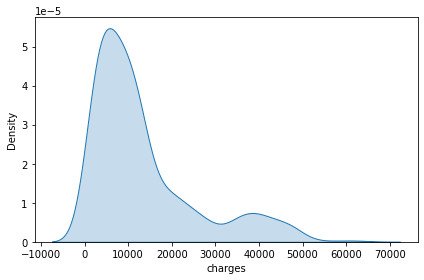

In [8]:
fig, axes = plt.subplots()
sns.kdeplot(df.charges, 
            shade=True)


fig.tight_layout()

En el siguiente fragmento se hará una comparación de esta distribución con varias de las distribuciones más típicas, con el objetivo de averiguar cuál de ellas se ajusta más, a través del **Sum of Square Error (SSE)**, a la de nuestra variable respuesta.

Fuente: [stackoverflow](https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1)

Text(0, 0.5, 'charges')

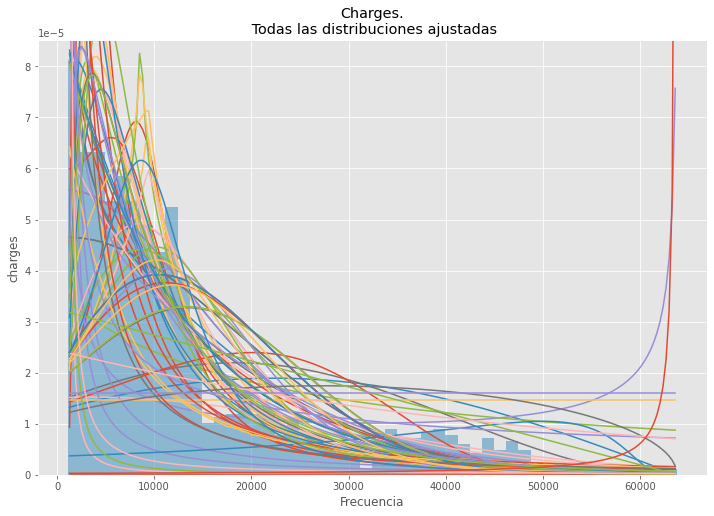

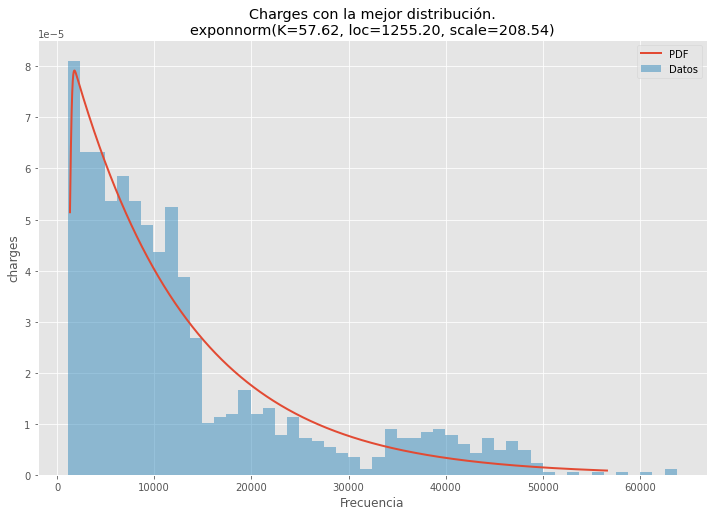

In [9]:
titulo1 = u'Charges.\n Todas las distribuciones ajustadas'
xlabel = u'Frecuencia'
ylabel = 'charges'

titulo2 = u'Charges con la mejor distribución.\n'

%matplotlib inline

import warnings

import scipy.stats as st
import statsmodels.api as sm


matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check  
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm, st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data from statsmodels datasets
data = df.charges

# Plot for comparison
plt.figure(figsize=(12,8))
#ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(titulo1)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Datos', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(titulo2 + dist_str)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

Gracias a ello podemos comprobar que la distribución de nuestra variable respuesta se ajusta más a la de una **exGaussian distribution**, es decir, una distribución Gaussiana exponencialmente modificada.

#### VARIABLES NUMÉRICAS

En este apartado haremos un análisis de las variables independientes numéricas. 

En primer lugar echaremos un vistazo general.

Se puede comprobar que, a pesar de formar parte de variables completamente diferentes por definición, "age" y "bmi" comparten un rango de valores similar, no así la variable "children", la cual toma unos pocos valores.

In [10]:
df[featuresNum].describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


Al igual que con la variable respuesta, hacemos una representación gráfica de la distribución de nuestras variables independientes numéricas.

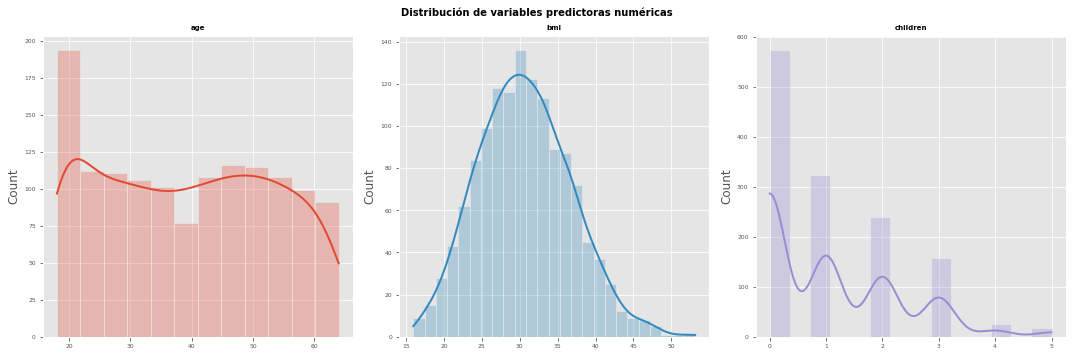

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flat

for i, column in enumerate(featuresNum):
    sns.histplot(
        data    = df,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(column, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables predictoras numéricas', fontsize = 10, fontweight = "bold");

In [12]:
df.children.value_counts().sort_index()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Como ya se había comprobado desde la descripción de estas variables, y se corrobora en este último paso de forma más visual, la variable *children* toma unos pocos valores. 

No es recomendable tener una variable numérica que tome pocos valores, sobre todo si la mayoría de ellos se concentran en uno sólo de estos. Así que sería buena idea transformar esta variable a categórica. No sólo eso, sino además concentrar todas las observaciones que se hacen para número de hijos igual o mayor que 3 en una sóla categoría (*3_mas*), ya que las categorías 4 y 5 hijos apenas tienen representación.

In [13]:
df.children = df.children.astype("str")

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

In [15]:
children_replace = {'3': "3_mas", '4': "3_mas", '5': "3_mas"}

df['children'] = df['children'].map(children_replace).fillna(df['children'])

In [16]:
df.children.value_counts().sort_index()

0        574
1        324
2        240
3_mas    200
Name: children, dtype: int64

De esta forma, dentro de las variables independientes, nos quedamos con dos variables numéricas y cuatro variables categóricas.

Actualizamos nuestras listas de variables.

In [17]:
featuresNum = ['age', 'bmi']
featuresCat = ['sex', 'children', 'smoker', 'region']
label = 'charges'

In [18]:
df[featuresNum].describe()

,age,bmi
count,1338.000000,1338.000000
mean,39.207025,30.663397
std,14.049960,6.098187
min,18.000000,15.960000
25%,27.000000,26.296250
50%,39.000000,30.400000
75%,51.000000,34.693750
max,64.000000,53.130000


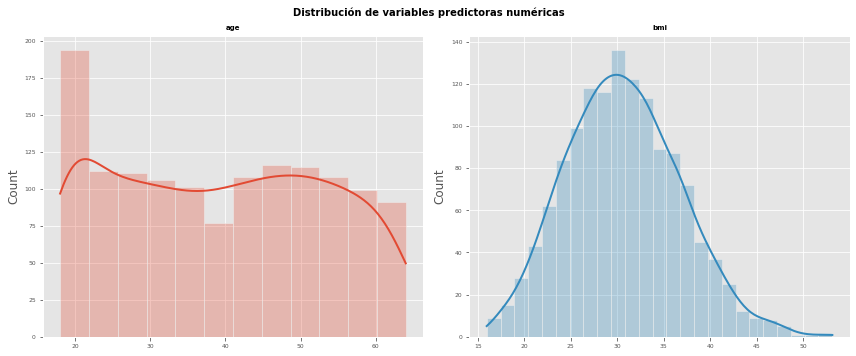

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flat

for i, column in enumerate(featuresNum):
    sns.histplot(
        data    = df,
        x       = column,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(column, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables predictoras numéricas', fontsize = 10, fontweight = "bold");

Calculamos la correlación entre las variables predictoras y la variable respuesta.

In [20]:
corr = round(df.corr(), 3)
corr.style.background_gradient()

,age,bmi,charges
age,1.000000,0.109000,0.299000
bmi,0.109000,1.000000,0.198000
charges,0.299000,0.198000,1.000000


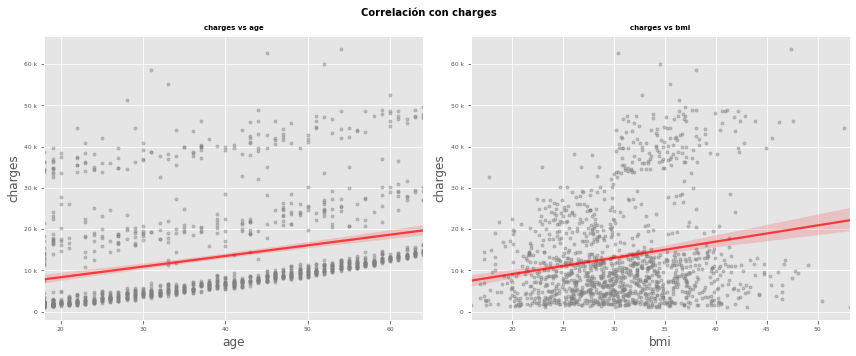

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flat

for i, column in enumerate(featuresNum):
    sns.regplot(
        x           = df[column],
        y           = df[label],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"charges vs {column}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel(label)
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con charges', fontsize = 10, fontweight = "bold");

De estas operaciones sacamos algunas conclusiones:

De forma general, se considera que una correlación es fuerte a partir de un valor de $\pm 0.6 \sim \pm0.7$, y débil cuando está entre $0$ y $\pm3$. Por ello, la correlación entre las variables *age* y *bmi* respecto a *charges* es baja.

El punto negativo es que sería deseable que existiese una correlación alta entre las variables predictoras y la variable que queremos predecir. Si así fuera, nuestro modelo tendría más posibilidades de predecir dicha variable correctamente.

El punto positivo es que no es deseable, de cara a la fiabilidad del modelo, que exista una alta correlación entre las variables independientes. Y en este caso tampoco la hay entre las variables *age* y *bmi*.

#### VARIABLES CATEGÓRICAS

Hacemos ahora una representación mediante gráficos de barras de la distribución de las variables categóricas.

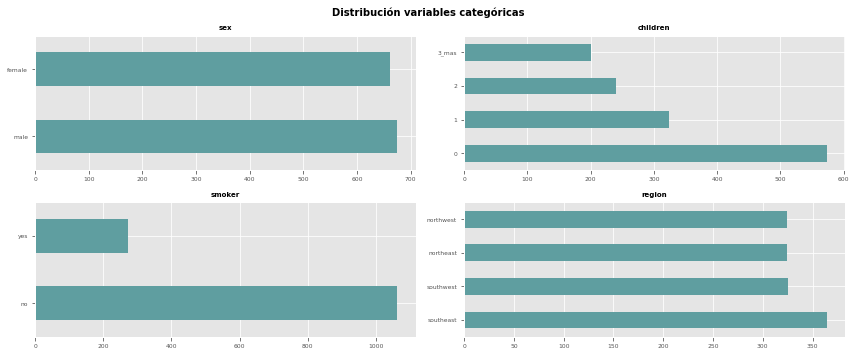

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
axes = axes.flat

for i, column in enumerate(featuresCat):
    df[column].value_counts().plot.barh(ax = axes[i], color = 'cadetblue')
    axes[i].set_title(column, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables categóricas',
             fontsize = 10, fontweight = "bold");

Comprobamos que la proproción de valores en *sex* y *region* está muy igualada. Algo menos en la variable *children*, en la que la mayoría de los casos se los lleva un sólo valor. Y bastante más descompensada en *smoker*.

Para hacernos una idea de la correlación entre las variables categóricas y la variable respuesta, mostraremos su distribución, en este caso mediante un gráfico de cajas y otro de violín.

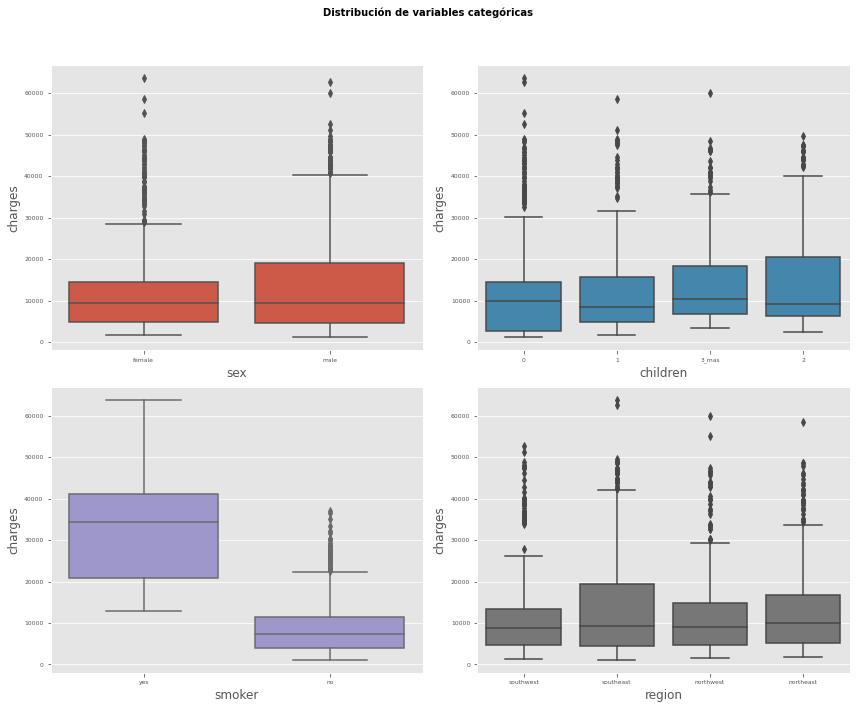

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flat

for i, column in enumerate(featuresCat):
    sns.boxplot(
        data    = df,
        x       = column,
        y       = df['charges'],
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    #axes[i].set_title(column, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("charges")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables categóricas', fontsize = 10, fontweight = "bold");

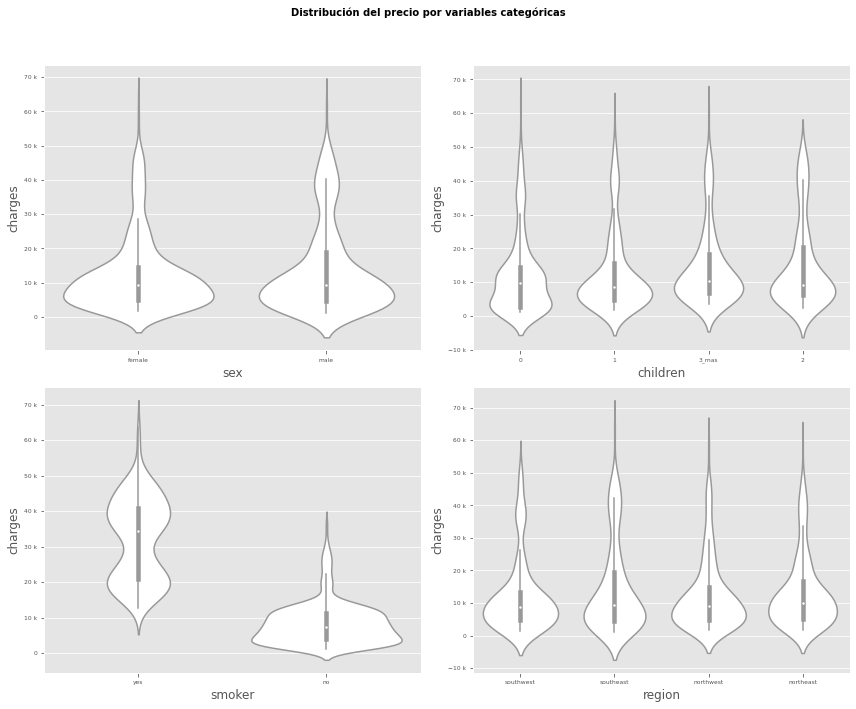

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flat

for i, column in enumerate(featuresCat):
    sns.violinplot(
        data  = df,
        x     = column,
        y     = label,
        color = "white",
        ax    = axes[i]
    )
    #axes[i].set_title(f"precio vs {column}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("charges")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por variables categóricas', fontsize = 10, fontweight = "bold");

Después de visualizar de forma gráfica la distribución de las variables categóricas se puede deducir que la correlación de *charges* respecto a las variables *sex*, *children* y *region* es prácticamente inexistente, ya que para todos los valores posibles de estas variables se toman prácticamente los mismos valores de *charges*. No así en cuanto a la variable *smoker*, en la que sí que se observa una clara diferencia del valor de *charges* cuando se trata de un fumador o un no fumador.

Para tener un valor exacto de correlación, y con la idea de crear posteriormente el modelo de predicción, convertiremos todas las variables categóricas en numéricas binarizándolas mediante el método *get_dummies*.

In [26]:
df2 = pd.get_dummies(df, columns= featuresCat)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   charges           1338 non-null   float64
 3   sex_female        1338 non-null   uint8  
 4   sex_male          1338 non-null   uint8  
 5   children_0        1338 non-null   uint8  
 6   children_1        1338 non-null   uint8  
 7   children_2        1338 non-null   uint8  
 8   children_3_mas    1338 non-null   uint8  
 9   smoker_no         1338 non-null   uint8  
 10  smoker_yes        1338 non-null   uint8  
 11  region_northeast  1338 non-null   uint8  
 12  region_northwest  1338 non-null   uint8  
 13  region_southeast  1338 non-null   uint8  
 14  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(1), uint8(12)
memory usage: 47.2 KB


In [27]:
corr = df2.corr()
print(corr[label].sort_values(ascending=False))

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children_2          0.069639
sex_male            0.057292
children_3_mas      0.045213
region_northeast    0.006349
children_1         -0.025180
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
children_0         -0.064760
smoker_no          -0.787251
Name: charges, dtype: float64


Ahora sí, tenemos unos resultados completos de correlación de todas las variables independientes con respecto a la variable dependiente.

De esta lista podemos observar que la variable que más nos va a ayudar a la hora de predecir datos futuros es *smoker*. Sería deseable contar con un mayor número de variables independientes con correlaciones fuertes para tener un modelo de preodicción más sólido.

El análsis de los datos es importante para observar este tipo de sucesos y valorar la posibilidad de hacer modificaciones en los mismos, o descartar directamente las variables que no nos vayan a aportar información útil.

En las líneas posteriores se ha optado por unificar los valores de la variable *children*, pasando a tener únicamente los valores *0* hijos y *1_mas*. No obsante no se ha conseguido ni aún así obtener una correlación aceptable.

In [50]:
children_replace = {'1': "1_mas", '2': "1_mas", '3_mas': "1_mas"}

df['children'] = df['children'].map(children_replace).fillna(df['children'])

df.children.value_counts().sort_index()

0        573
1_mas    764
Name: children, dtype: int64

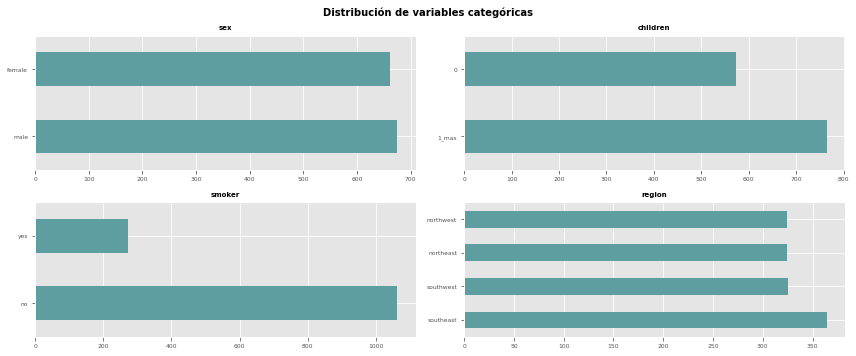

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5))
axes = axes.flat

for i, column in enumerate(featuresCat):
    df[column].value_counts().plot.barh(ax = axes[i], color = 'cadetblue')
    axes[i].set_title(column, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de variables categóricas',
             fontsize = 10, fontweight = "bold");

In [53]:
df3 = pd.get_dummies(df, columns= featuresCat)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   charges           1337 non-null   float64
 3   sex_female        1337 non-null   uint8  
 4   sex_male          1337 non-null   uint8  
 5   children_0        1337 non-null   uint8  
 6   children_1_mas    1337 non-null   uint8  
 7   smoker_no         1337 non-null   uint8  
 8   smoker_yes        1337 non-null   uint8  
 9   region_northeast  1337 non-null   uint8  
 10  region_northwest  1337 non-null   uint8  
 11  region_southeast  1337 non-null   uint8  
 12  region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(1), uint8(10)
memory usage: 94.8 KB


In [55]:
corr = df3.corr()
print(corr[label].sort_values(ascending=False))

charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children_1_mas      0.063985
sex_male            0.058044
region_northeast    0.005945
region_northwest   -0.038695
region_southwest   -0.043637
sex_female         -0.058044
children_0         -0.063985
smoker_no          -0.787234
Name: charges, dtype: float64


## 4. División de datos de entrenamiento y test

Dadas las circunstancias de correlación entre variables independientes y respuesta, se opta por prescindir de las variables *sex*, *children* y *region*.

Seguidamente se hacen las particiones correspondientes a los grupos de entrenamiento y test, siendo el tamaño de los datos de entrenamiento de un 80% con respecto al dataset completo.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = ['charges', 'sex', 'children', 'region'], axis = 'columns'),
                                        df[label],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [62]:
print("Partición datos de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición datos de entrenamento
-----------------------
count     1069.000000
mean     13228.876071
std      12119.544496
min       1121.873900
25%       4837.582300
50%       9304.701900
75%      16420.494550
max      63770.428010
Name: charges, dtype: float64


In [63]:
print("Partición datos de test")
print("-----------------------")
print(y_test.describe())

Partición datos de test
-----------------------
count      268.000000
mean     13479.540700
std      12094.192208
min       1256.299000
25%       4491.055712
50%       9589.981050
75%      17996.048500
max      48824.450000
Name: charges, dtype: float64


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 645 to 816
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1069 non-null   int64  
 1   bmi     1069 non-null   float64
 2   smoker  1069 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 33.4+ KB


## 5. Preprocesado

In [34]:
#estandarizado de variables numéricas

## 6. Creación del modelo

<br><br><br><br>TO DO:

* Finalizar documentación
* Utilización de pipelines y column transformer.
* Creación de un modelo de predicción.
* Utilización de diferentes algoritmos.
* Hiperparámetros.
* Validación y métricas.